In [61]:
from keras.datasets import mnist

In [62]:
(train_data, train_target),(test_data,test_target)=mnist.load_data()

In [63]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


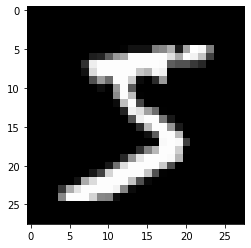

In [64]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [65]:
train_target[0]

5

In [66]:
#build up a neural network

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten #convert image to flattern layer

In [55]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [56]:
from keras.utils import np_utils 

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [57]:
new_train_data=train_data/255
new_test_data=test_data/255

In [58]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2073 - accuracy: 0.9372
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0958 - accuracy: 0.9706
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0532 - accuracy: 0.9841
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0414 - accuracy: 0.9876
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0386 - accuracy: 0.9878
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0298 - accuracy: 0.9908
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0245 - accuracy: 0.9927
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

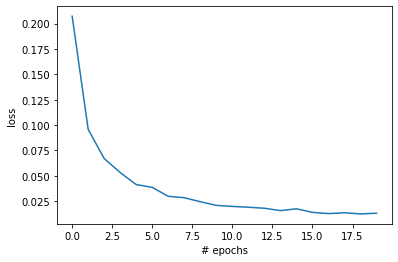

In [59]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

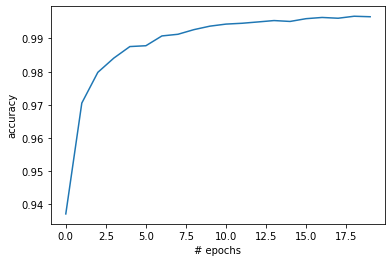

In [60]:

plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [46]:
model.evaluate(new_test_data, new_test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9819


[0.10834164172410965, 0.9818999767303467]

In [47]:
#save the knowledge to a physical file
model.save_weights('FFNN-MNIST.h5')